In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

2023-12-11 11:56:37.428650: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 11:56:37.486871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 11:56:38.323273: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "Brain Tumor Data Set/Brain Tumor Data Set"

gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    shuffle=True,
    color_mode = "grayscale",
    target_size=(100,100),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    shuffle=True,
    color_mode = "grayscale",
    target_size=(100,100),
    subset="validation"
)


Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


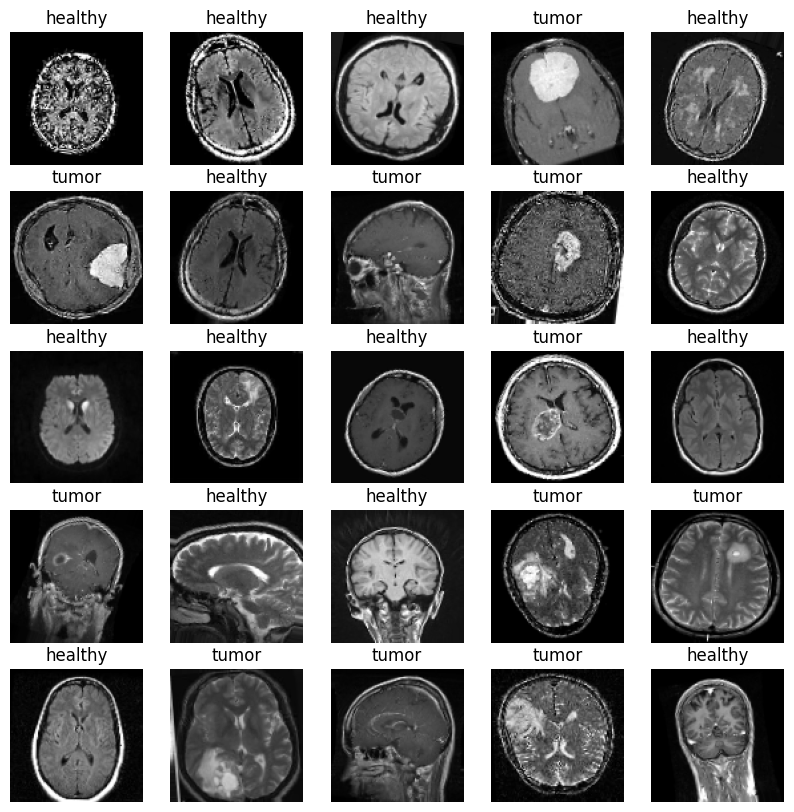

In [4]:
plt.figure(figsize=(10,10))
img, label = train_ds.next()
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i], cmap="gray")
    plt.axis('off')
    if label[i][0]==1:
        plt.title("tumor")
    else:
        plt.title("healthy")
    
    

In [5]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=10, validation_data=(valid_ds))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9604)              0         
                                                                 
 dense (Dense)               (None, 64)                614720    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 614,890
Trainable params: 614,890
Non-trainable params: 0
__________________________________________________

2023-12-11 11:56:41.598778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-11 11:56:41.598854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2023-12-11 11:56:41.598868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2023-12-11 11:56:41.599019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2023-12-11 11:56:41.599064: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2023-12-11 11:56:41.599075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


Epoch 1/10


2023-12-11 11:56:41.907343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


116/116 [==============================] - ETA: 0s - loss: 0.4980 - accuracy: 0.7593

2023-12-11 11:56:55.299808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


116/116 [==============================] - 16s 127ms/step - loss: 0.4980 - accuracy: 0.7593 - val_loss: 0.3828 - val_accuracy: 0.8477
Epoch 2/10
116/116 [==============================] - 15s 133ms/step - loss: 0.3403 - accuracy: 0.8598 - val_loss: 0.3308 - val_accuracy: 0.8640
Epoch 3/10
116/116 [==============================] - 16s 134ms/step - loss: 0.3094 - accuracy: 0.8693 - val_loss: 0.2885 - val_accuracy: 0.8890
Epoch 4/10
116/116 [==============================] - 16s 134ms/step - loss: 0.2299 - accuracy: 0.9125 - val_loss: 0.2796 - val_accuracy: 0.8814
Epoch 5/10
116/116 [==============================] - 15s 129ms/step - loss: 0.2006 - accuracy: 0.9288 - val_loss: 0.2409 - val_accuracy: 0.9021
Epoch 6/10
116/116 [==============================] - 15s 133ms/step - loss: 0.1721 - accuracy: 0.9391 - val_loss: 0.1764 - val_accuracy: 0.9347
Epoch 7/10
116/116 [==============================] - 16s 134ms/step - loss: 0.1545 - accuracy: 0.9454 - val_loss: 0.1377 - val_accuracy: 0.9

In [6]:
img, label = valid_ds.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 95ms/step


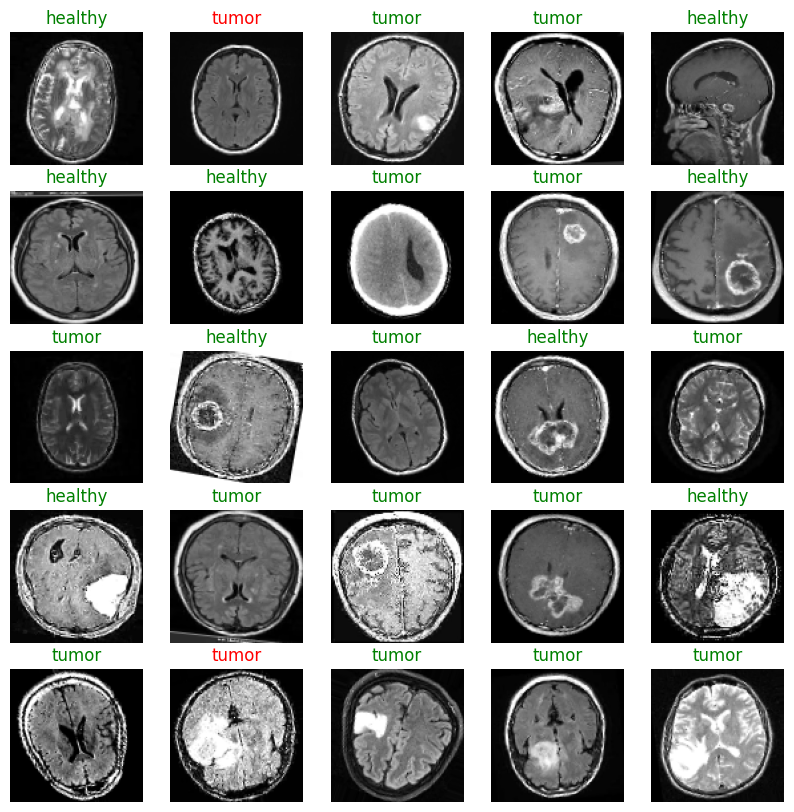

In [7]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i-1], cmap="gray")
    plt.axis('off')
    if label[i][0]==1:
        title = "tumor"
    else:
        title = "healthy"
        
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title(title, color = 'green')
    else:
        plt.title(title, color = 'red')        

In [8]:
y_pred

array([[2.00624004e-01, 7.99375951e-01],
       [4.36076476e-07, 9.99999523e-01],
       [1.92751735e-01, 8.07248235e-01],
       [9.99994993e-01, 4.97987367e-06],
       [9.35798466e-01, 6.42015710e-02],
       [1.05489967e-02, 9.89450991e-01],
       [1.80464733e-04, 9.99819577e-01],
       [2.13059023e-01, 7.86940932e-01],
       [9.88653839e-01, 1.13461548e-02],
       [7.78131187e-01, 2.21868843e-01],
       [1.31102977e-03, 9.98688996e-01],
       [9.99954581e-01, 4.53841058e-05],
       [3.11320655e-05, 9.99968886e-01],
       [9.92739022e-01, 7.26100383e-03],
       [4.28811436e-05, 9.99957085e-01],
       [9.99999166e-01, 8.70606527e-07],
       [1.43282518e-01, 8.56717527e-01],
       [9.99410868e-01, 5.89183823e-04],
       [9.99916077e-01, 8.39436034e-05],
       [9.99764383e-01, 2.35602827e-04],
       [3.39264539e-03, 9.96607423e-01],
       [9.99235153e-01, 7.64889934e-04],
       [2.22081602e-01, 7.77918339e-01],
       [9.48039174e-01, 5.19608632e-02],
       [9.909846